In [6]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = '/home/dhruv04/Downloads/ASR_Hindi.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.02 seconds.
(1563, 256)


In [7]:
from spectralcluster import RefinementOptions
from spectralcluster import SpectralClusterer

refinement_operations = RefinementOptions(
    p_percentile=0.90,
    gaussian_blur_sigma=1
)

clusterer = SpectralClusterer(
    min_clusters=3,
    max_clusters=100,
    refinement_options=refinement_operations
)

labels = clusterer.predict(cont_embeds)

In [8]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0
    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
labelling = create_labelling(labels,wav_splits)

In [9]:
print(labelling)

[('1', 0, 1.1), ('2', 1.1, 1.16), ('1', 1.16, 1.22), ('2', 1.22, 1.28), ('1', 1.28, 1.4), ('2', 1.4, 1.52), ('1', 1.52, 1.58), ('2', 1.58, 1.64), ('1', 1.64, 1.7), ('2', 1.7, 1.82), ('1', 1.82, 1.88), ('2', 1.88, 2.12), ('1', 2.12, 2.24), ('2', 2.24, 2.42), ('1', 2.42, 2.48), ('2', 2.48, 2.54), ('1', 2.54, 2.6), ('2', 2.6, 3.26), ('1', 3.26, 3.32), ('2', 3.32, 3.38), ('0', 3.38, 3.44), ('2', 3.44, 3.56), ('0', 3.56, 3.74), ('2', 3.74, 4.16), ('0', 4.16, 4.22), ('2', 4.22, 4.28), ('0', 4.28, 4.94), ('1', 4.94, 5.0), ('0', 5.0, 5.06), ('1', 5.06, 5.66), ('2', 5.66, 8.12), ('1', 8.12, 10.52), ('2', 10.52, 10.58), ('1', 10.58, 10.76), ('0', 10.76, 11.84), ('1', 11.84, 16.22), ('0', 16.22, 18.5), ('2', 18.5, 19.52), ('0', 19.52, 19.58), ('2', 19.58, 19.88), ('0', 19.88, 20.6), ('1', 20.6, 20.66), ('0', 20.66, 22.58), ('2', 22.58, 23.96), ('1', 23.96, 24.08), ('2', 24.08, 24.2), ('1', 24.2, 24.26), ('2', 24.26, 24.32), ('1', 24.32, 24.86), ('2', 24.86, 24.98), ('1', 24.98, 25.34), ('2', 25.3

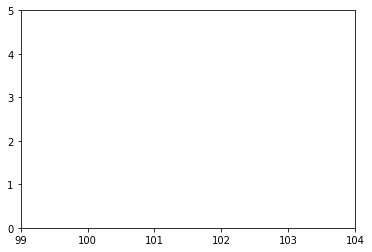

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()
y = []
x = []

for element in labelling:
    y.append(1+int(element[0]))
    y.append(1+int(element[0]))
    x.append(element[1])
    x.append(element[2])

ax.plot(x, y)
ax.set_ylim(0, 5)

def animate(frame):
   ax.set_xlim(left=frame, right=frame+5)

ani = animation.FuncAnimation(fig, animate)

from IPython.display import HTML
HTML(ani.to_jshtml())

